In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import pickle
import random
import glob

In [2]:
from numpy.random import seed
seed(42)

In [3]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
IMG_SIZE = 150
BATCH_SIZE = 32
SEED = 42

In [4]:
labels = ['Bacterial Pneumonia', 'Corona Virus Disease', 'Normal', 'Tuberculosis', 'Viral Pneumonia']
img_size = 200

def get_training_data(data_dir):
    data = [] 
    
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
main_path = "C:/Users/HP/Desktop/Lung Disease Dataset"

train_path = os.path.join(main_path, "train")
test_path = os.path.join(main_path, "test")
val_path = os.path.join(main_path, "val")

In [6]:
train_normal = glob.glob(train_path + "/Normal/*.jpeg")
train_bac_pneumonia = glob.glob(train_path + "/Bacterial Pneumonia/*.jpeg")
train_corona = glob.glob(train_path + "/Corona Virus Disease/*.jpeg")
train_tb = glob.glob(train_path + "/Tuberculosis/*.jpeg")
train_viral_pneumonia = glob.glob(train_path + "/Viral Pneumonia/*.jpeg")

In [7]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_bac_pneumonia])
train_list.extend([x for x in train_corona])
train_list.extend([x for x in train_tb])
train_list.extend([x for x in train_viral_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal'] * len(train_normal) , ['Bacterial Pneumonia'] * len(train_bac_pneumonia), ['Corona Virus Disease'] * len(train_corona), ['Tuberculosis'] * len(train_tb), ['Viral Pneumonia'] * len(train_viral_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

In [8]:
test_normal = glob.glob(test_path + "/Normal/*.jpeg")
test_bac_pneumonia = glob.glob(test_path + "/Bacterial Pneumonia/*.jpeg")
test_corona = glob.glob(test_path + "/Corona Virus Disease/*.jpeg")
test_tb = glob.glob(test_path + "/Tuberculosis/*.jpeg")
test_viral_pneumonia = glob.glob(test_path + "/Viral Pneumonia/*.jpeg")

In [9]:
test_list = [x for x in test_normal]
test_list.extend([x for x in test_bac_pneumonia])
test_list.extend([x for x in test_corona])
test_list.extend([x for x in test_tb])
test_list.extend([x for x in test_viral_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal'] * len(test_normal) , ['Bacterial Pneumonia'] * len(test_bac_pneumonia), ['Corona Virus Disease'] * len(test_corona), ['Tuberculosis'] * len(test_tb), ['Viral Pneumonia'] * len(test_viral_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [10]:
val_normal = glob.glob(train_path + "/Normal/*.jpeg")
val_bac_pneumonia = glob.glob(train_path + "/Bacterial Pneumonia/*.jpeg")
val_corona = glob.glob(train_path + "/Corona Virus Disease/*.jpeg")
val_tb = glob.glob(train_path + "/Tuberculosis/*.jpeg")
val_viral_pneumonia = glob.glob(train_path + "/Viral Pneumonia/*.jpeg")

In [11]:
val_list = [x for x in val_normal]
val_list.extend([x for x in val_bac_pneumonia])
val_list.extend([x for x in val_corona])
val_list.extend([x for x in val_tb])
val_list.extend([x for x in val_viral_pneumonia])

df_val = pd.DataFrame(np.concatenate([['Normal'] * len(val_normal) , ['Bacterial Pneumonia'] * len(val_bac_pneumonia), ['Corona Virus Disease'] * len(val_corona), ['Tuberculosis'] * len(val_tb), ['Viral Pneumonia'] * len(val_viral_pneumonia)]), columns = ['class'])
df_val['image'] = [x for x in val_list]

In [12]:
df_train.head()

class                                              image
0  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\train...
1  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\train...
2  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\train...
3  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\train...
4  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\train...

In [13]:
df_test.head()

class                                              image
0  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\test/...
1  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\test/...
2  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\test/...
3  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\test/...
4  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\test/...

In [14]:
df_val.head()

class                                              image
0  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\train...
1  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\train...
2  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\train...
3  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\train...
4  Normal  C:/Users/HP/Desktop/Lung Disease Dataset\train...

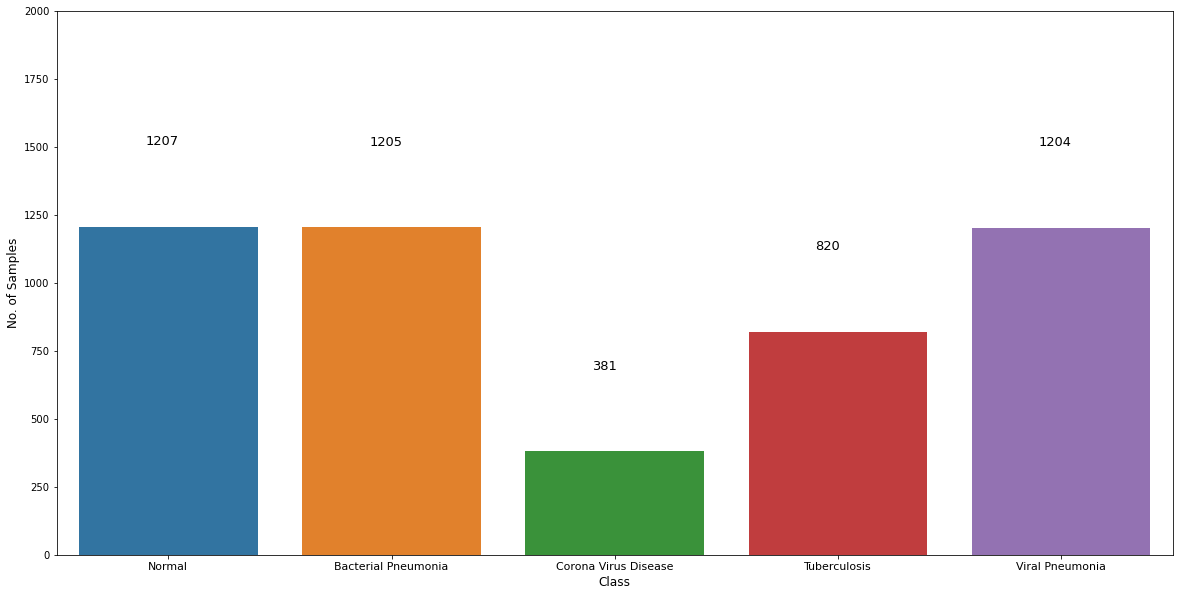

In [15]:
plt.figure(figsize=(20, 10))

ax = sns.countplot(x = 'class', data = df_train)

plt.xlabel("Class", fontsize= 12)
plt.ylabel("No. of Samples", fontsize= 12)
plt.ylim(0, 2000)
plt.xticks([0, 1, 2, 3, 4], ['Normal', 'Bacterial Pneumonia', 'Corona Virus Disease', 'Tuberculosis', 'Viral Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() + 0.30, p.get_height() + 300), fontsize = 13)
    
plt.show()

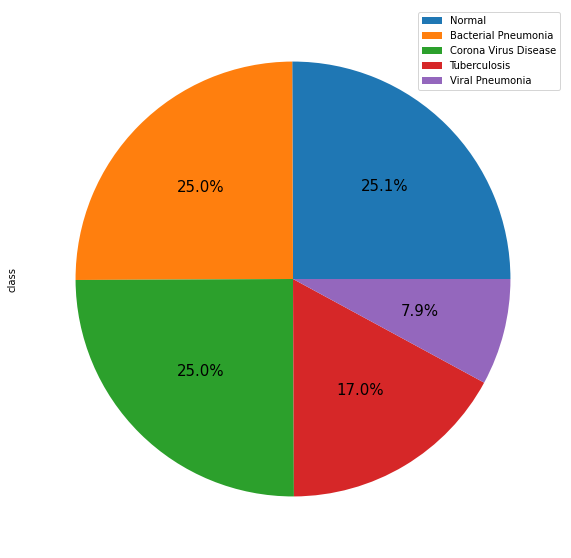

In [16]:
plt.figure(figsize=(10,10))

df_train['class'].value_counts().plot(kind='pie', labels = ['', '', '', '', ''], autopct='%1.1f%%', textprops = {"fontsize":15})

plt.legend(labels = ['Normal', 'Bacterial Pneumonia', 'Corona Virus Disease', 'Tuberculosis', 'Viral Pneumonia'])
plt.show()

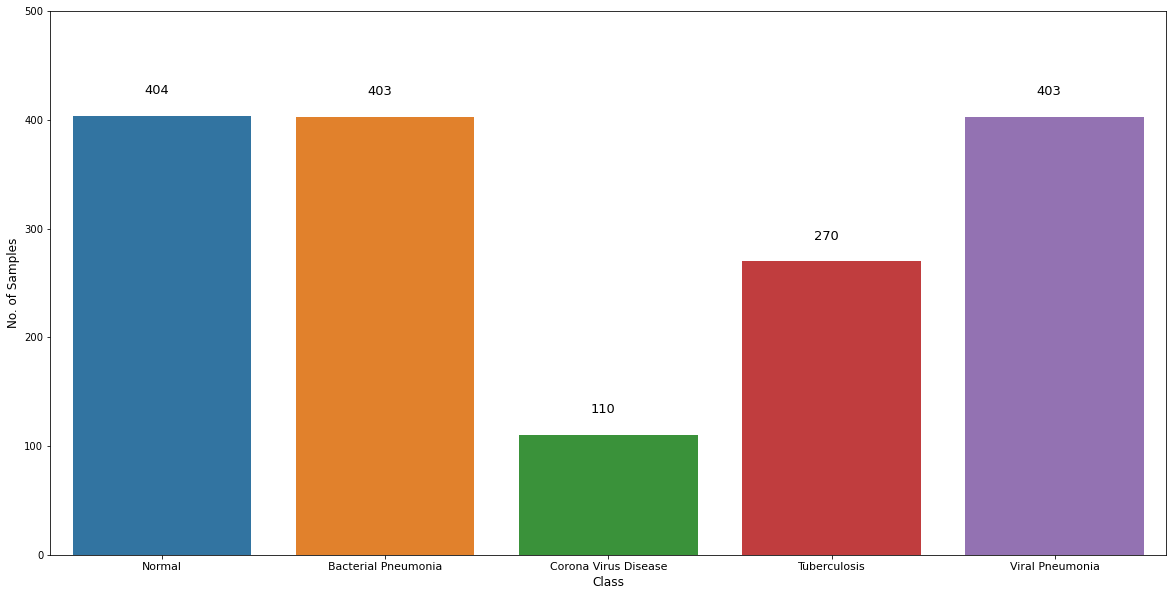

In [17]:
plt.figure(figsize=(20, 10))

ax = sns.countplot(x = 'class', data = df_test)

plt.xlabel("Class", fontsize= 12)
plt.ylabel("No. of Samples", fontsize= 12)
plt.ylim(0, 500)
plt.xticks([0, 1, 2, 3, 4], ['Normal', 'Bacterial Pneumonia', 'Corona Virus Disease', 'Tuberculosis', 'Viral Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() + 0.32, p.get_height() + 20), fontsize = 13)
    
plt.show()

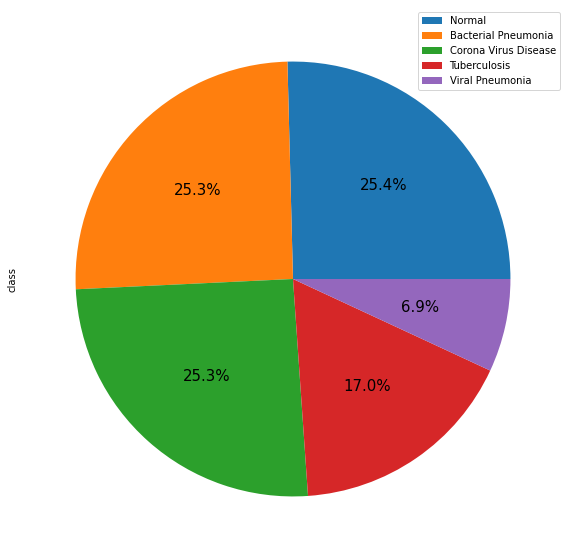

In [18]:
plt.figure(figsize=(10, 10))

df_test['class'].value_counts().plot(kind='pie', labels = ['', '', '', '', ''], autopct='%1.1f%%', textprops = {"fontsize":15})

plt.legend(labels=['Normal', 'Bacterial Pneumonia', 'Corona Virus Disease', 'Tuberculosis', 'Viral Pneumonia'])
plt.show()

Train Set - Normal


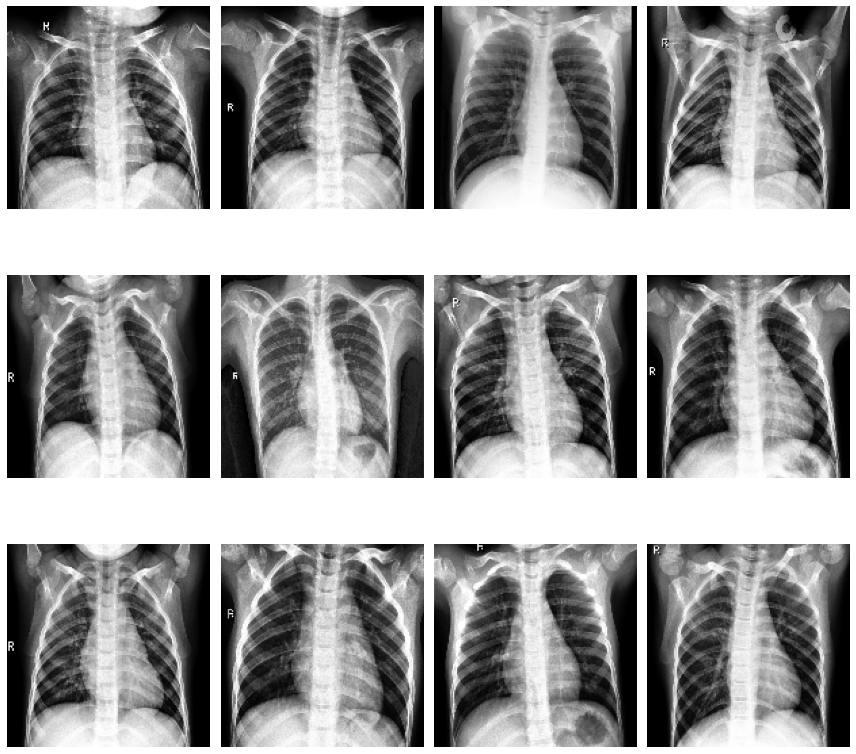

In [19]:
print('Train Set - Normal')

plt.figure(figsize=(12, 12))

for i in range(0, 12):
    plt.subplot(3, 4, i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Bacterial Pneumonia


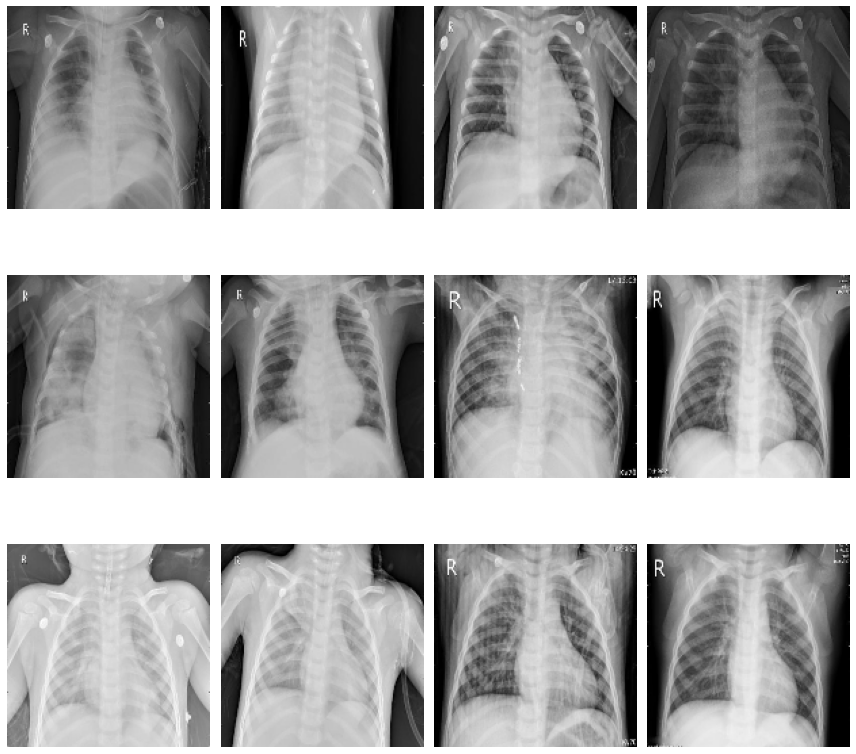

In [20]:
print('Train Set - Bacterial Pneumonia')

plt.figure(figsize=(12, 12))

for i in range(0, 12):
    plt.subplot(3, 4, i + 1)
    img = cv2.imread(train_bac_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Corona Virus Disease


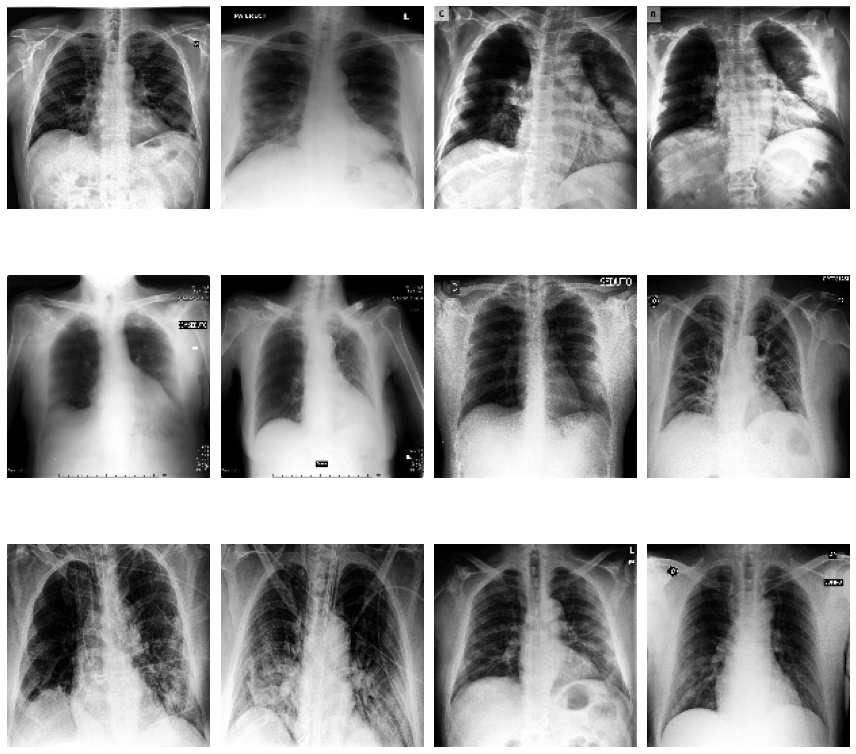

In [21]:
print('Train Set - Corona Virus Disease')

plt.figure(figsize=(12, 12))

for i in range(0, 12):
    plt.subplot(3, 4, i + 1)
    img = cv2.imread(train_corona[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Tuberculosis


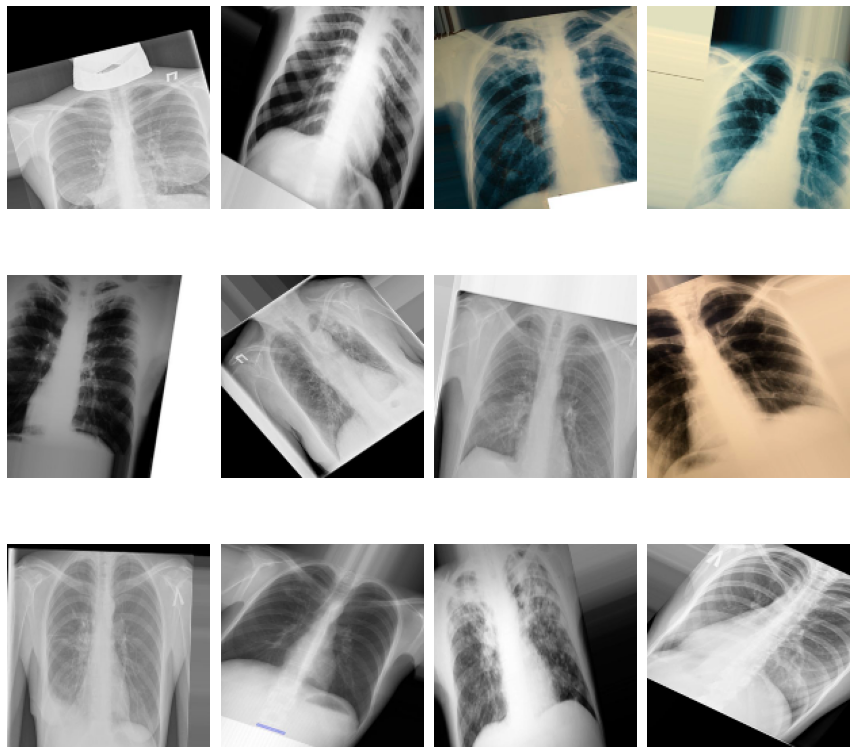

In [22]:
print('Train Set - Tuberculosis')

plt.figure(figsize=(12, 12))

for i in range(0, 12):
    plt.subplot(3, 4, i + 1)
    img = cv2.imread(train_tb[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Viral Pneumonia


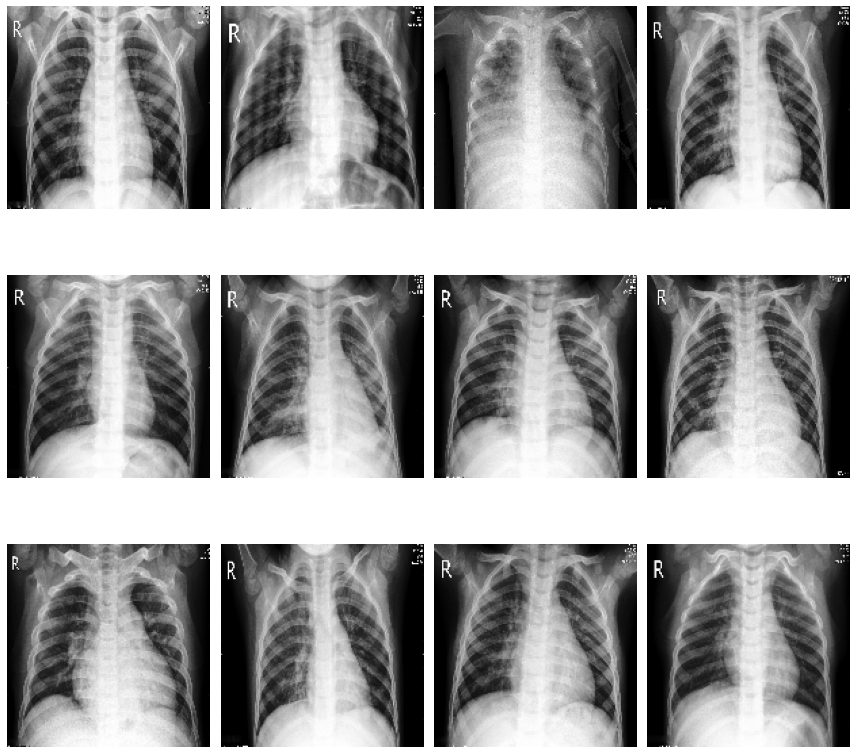

In [23]:
print('Train Set - Viral Pneumonia')

plt.figure(figsize=(12, 12))

for i in range(0, 12):
    plt.subplot(3, 4, i + 1)
    img = cv2.imread(train_viral_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Normal


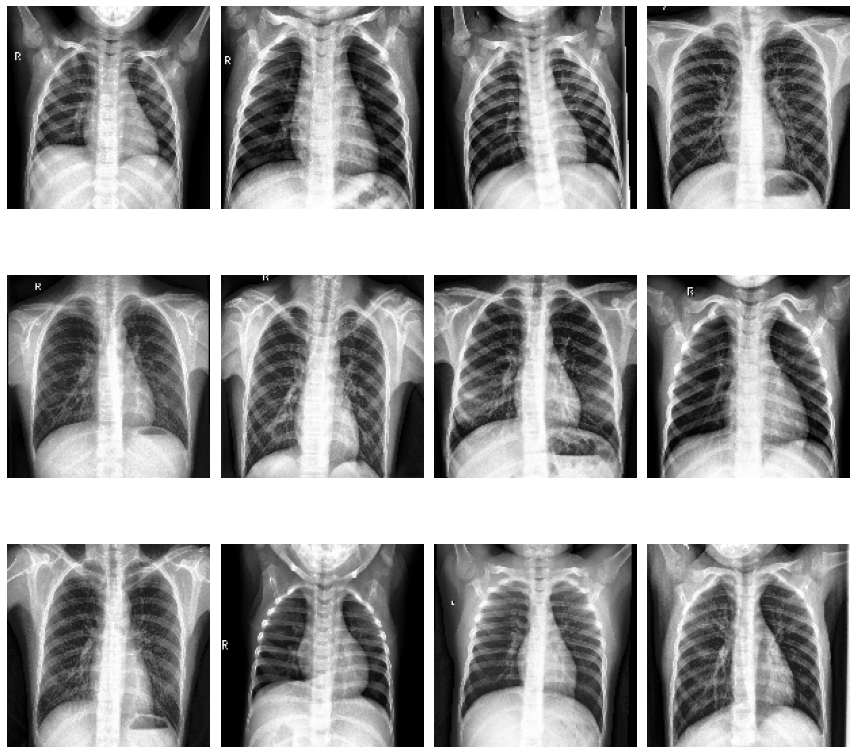

In [24]:
print('Test Set - Normal')

plt.figure(figsize=(12, 12))

for i in range(0, 12):
    plt.subplot(3, 4, i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Bacterial Pneumonia


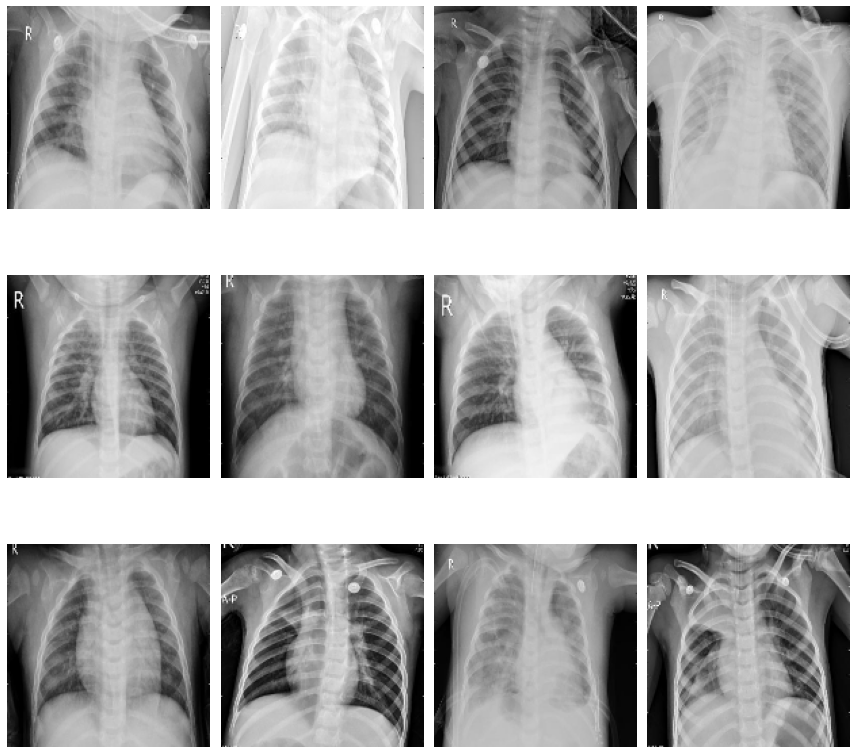

In [25]:
print('Test Set - Bacterial Pneumonia')

plt.figure(figsize=(12, 12))

for i in range(0, 12):
    plt.subplot(3, 4, i + 1)
    img = cv2.imread(test_bac_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Corona Virus Disease


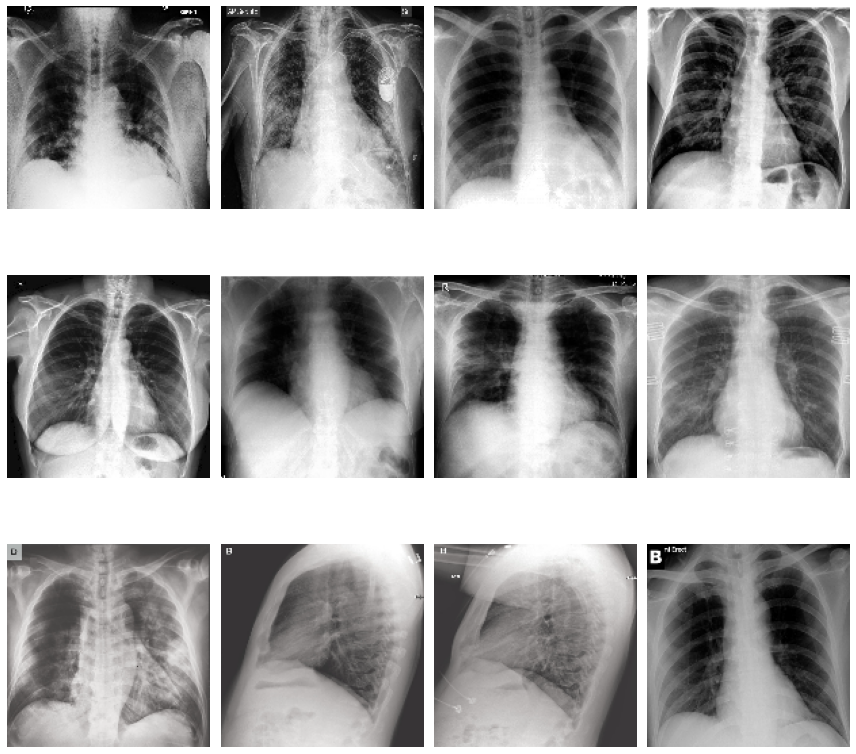

In [26]:
print('Test Set - Corona Virus Disease')

plt.figure(figsize=(12, 12))

for i in range(0, 12):
    plt.subplot(3, 4, i + 1)
    img = cv2.imread(test_corona[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Tuberculosis


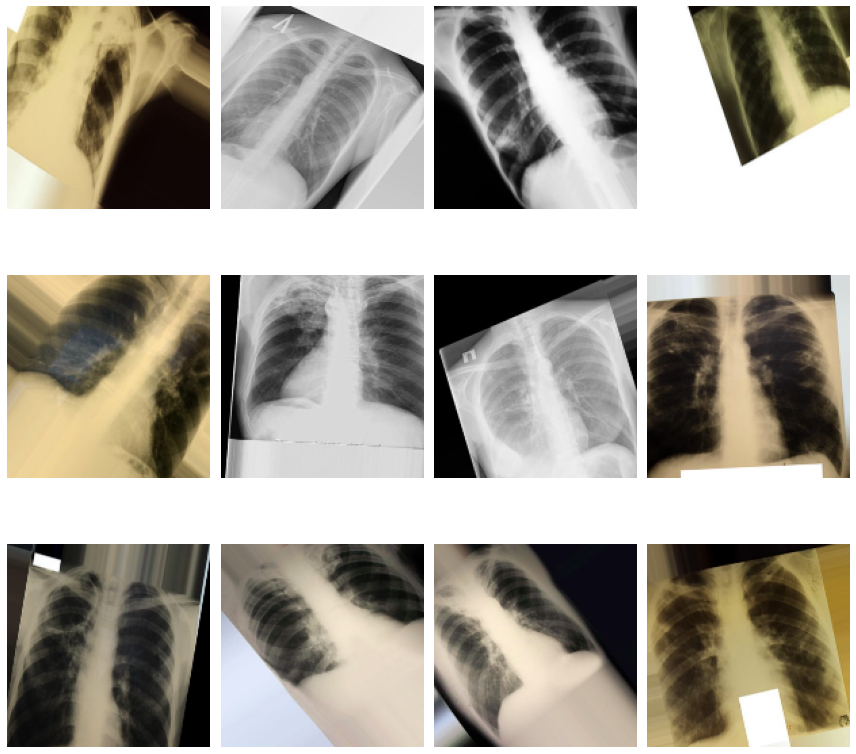

In [27]:
print('Test Set - Tuberculosis')

plt.figure(figsize=(12, 12))

for i in range(0, 12):
    plt.subplot(3, 4, i + 1)
    img = cv2.imread(test_tb[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Viral Pneumonia


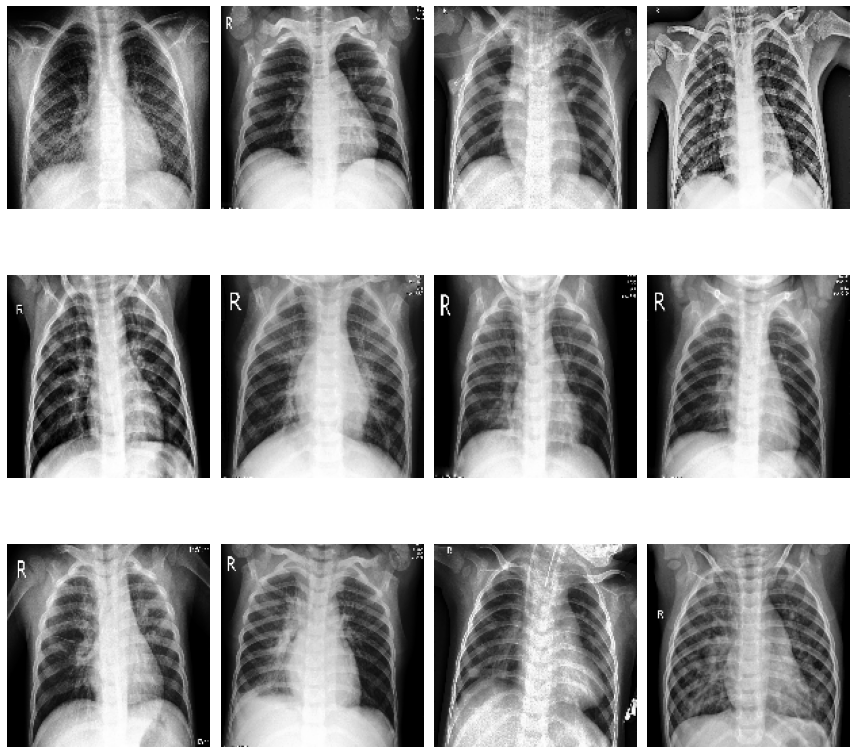

In [28]:
print('Test Set - Viral Pneumonia')

plt.figure(figsize=(12, 12))

for i in range(0, 12):
    plt.subplot(3, 4, i + 1)
    img = cv2.imread(test_viral_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0 / 255,
                                  zoom_range = 0.2,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size = BATCH_SIZE,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

Found 6054 images belonging to 5 classes.


In [30]:
validation_datagen = ImageDataGenerator(rescale = 1.0 / 255)

validation_generator = validation_datagen.flow_from_directory(val_path,
                                                             target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size = BATCH_SIZE,
                                                             class_mode = 'categorical',
                                                             shuffle = True)

Found 2016 images belonging to 5 classes.


In [46]:
(validation_datagen)

In [31]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Bacterial Pneumonia
1 : Corona Virus Disease
2 : Normal
3 : Tuberculosis
4 : Viral Pneumonia


CNN

In [32]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [40]:
def create_model():
    model = Sequential([
        Conv2D(filters = 128, kernel_size = (5, 5), padding = 'valid', input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size = (2, 2)),
        BatchNormalization(),
        
        Conv2D(filters = 64, kernel_size = (3, 3), padding = 'valid', kernel_regularizer = l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size = (2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units = 256, activation = 'relu'),
        Dropout(0.5),
        Dense(units = 5, activation = 'softmax')
    ])
    
    return model

In [41]:
cnn_model = create_model()

In [42]:
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 146, 146, 128)     9728      
_________________________________________________________________
activation_3 (Activation)    (None, 146, 146, 128)     0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 128)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 73, 73, 128)       512       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 71, 71, 64)        73792     
_________________________________________________________________
activation_4 (Activation)    (None, 71, 71, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 64)       

In [43]:
optimizer = Adam(learning_rate = 0.001)

In [44]:
cnn_model.compile(optimizer = optimizer, loss = CategoricalCrossentropy(), metrics = ['accuracy'])

In [45]:
history = cnn_model.fit(train_generator, 
                        epochs = 2,
                        validation_data = validation_generator,
                        verbose = 2)

Epoch 1/2


KeyboardInterrupt: 

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_path,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

In [ ]:
predictions = cnn_model.predict(test_generator)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator, batch_size=BATCH_SIZE)

In [ ]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")A

Confusion Matrix

In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

In [ ]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))